In [ ]:
from copy import deepcopy

import numpy as np
import pandas as pd
import sklearn

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, make_scorer, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

In [ ]:
ds_raw = pd.read_csv("winequality-red.csv", sep = ";")
ds_raw.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
ds = deepcopy(ds_raw)
ds = ds[(ds["quality"] != 3) & (ds["quality"] != 8)]
ds

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
ds["quality"].value_counts()

5    681
6    638
7    199
4     53
Name: quality, dtype: int64

In [ ]:
ds["volatile acidity"] = ds["volatile acidity"].apply(lambda x: np.log(x))
ds["residual sugar"] = ds["residual sugar"].apply(lambda x: np.log(x))
ds["chlorides"] = ds["chlorides"].apply(lambda x: np.log(x))
ds["total sulfur dioxide"] = ds["total sulfur dioxide"].apply(lambda x: np.log(x))
ds["sulphates"] = ds["sulphates"].apply(lambda x: np.log(x))
ds["alcohol"] = ds["alcohol"].apply(lambda x: np.log(x))

In [ ]:
fig = px.scatter_matrix(ds, dimensions=ds.columns[:-1], color="quality", title='Wine quality dataset', width=1200, height=700)
fig.update_traces(diagonal_visible=False)
fig.show()

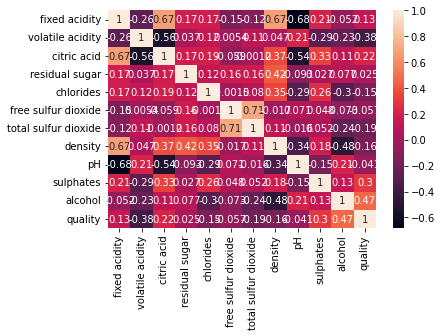

In [ ]:
sns.heatmap(ds.corr(), annot = True);

In [ ]:
X, y = ds[ds.columns[:-1]], ds["quality"]

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.527746,0.976027,-1.394015,-0.584206,-0.220540,-0.472386,-0.116223,0.555380,1.294416,-0.597175,-0.992719
1,-0.297428,1.627692,-1.394015,0.295981,0.559445,0.867524,0.847648,0.021518,-0.722650,0.271595,-0.565734
2,-0.297428,1.210213,-1.187675,-0.048066,0.365614,-0.089555,0.541138,0.128290,-0.332250,0.069700,-0.565734
3,1.660281,-1.633267,1.494756,-0.584206,-0.261176,0.101861,0.690849,0.662152,-0.982916,-0.440155,-0.565734
4,-0.527746,0.976027,-1.394015,-0.584206,-0.220540,-0.472386,-0.116223,0.555380,1.294416,-0.597175,-0.992719
...,...,...,...,...,...,...,...,...,...,...,...
1566,-1.218702,0.537056,-0.981334,-0.440267,0.298183,1.537480,0.250137,-0.992821,0.904016,-0.440155,0.141177
1567,-1.391441,0.289277,-0.878163,-0.172807,-0.845177,2.207435,0.459919,-0.875371,1.359482,0.769285,0.802448
1568,-1.161122,0.074256,-0.723408,-0.048066,-0.220540,1.250356,0.114707,-0.544376,0.708816,0.710018,0.617828
1569,-1.391441,0.743002,-0.774993,-0.440267,-0.261176,1.537480,0.250137,-0.688519,1.684816,0.464773,-0.155834


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=42)

In [ ]:
logit = LogisticRegression(penalty = 'none')
logit.fit(x_train, y_train)
preds = logit.predict(x_test)
logit_f1_avg_pno = f1_score(y_test, preds, average="weighted")
print("F1_weighted: ", logit_f1_avg_pno)

F1_weighted:  0.563075477918293


In [ ]:
cf = pd.DataFrame(logit.coef_).T
cf.columns = ['4','5','6','7']
cf

,4,5,6,7
0,0.535766,-0.472809,-0.207025,0.144068
1,0.784744,0.194022,-0.383460,-0.595306
2,0.437304,0.042549,-0.339357,-0.140497
3,0.410377,-0.238451,-0.296660,0.124734
4,0.061915,0.092321,0.043236,-0.197472
5,-0.205216,-0.047287,0.040099,0.212404
6,-0.134775,0.406743,0.103308,-0.375275
7,-0.890349,0.431424,0.517104,-0.058178
8,0.652714,-0.256040,-0.234197,-0.162477
9,-0.238383,-0.386306,0.037320,0.587369


In [ ]:
logit = LogisticRegression(penalty = 'l2')
logit.fit(x_train, y_train)
preds = logit.predict(x_test)
logit_f1_avg_pl2 = f1_score(y_test, preds, average="weighted")
print("F1_weighted: ", logit_f1_avg_pl2)

F1_weighted:  0.5579088661559732


In [ ]:
cf = pd.DataFrame(logit.coef_).T
cf.columns = ['4','5','6','7']
cf

,4,5,6,7
0,0.303597,-0.394170,-0.127264,0.217837
1,0.740698,0.198932,-0.368014,-0.571615
2,0.386540,0.047407,-0.323605,-0.110342
3,0.312461,-0.206183,-0.260980,0.154702
4,0.052452,0.095111,0.045567,-0.193130
5,-0.186779,-0.047572,0.038306,0.196046
6,-0.129739,0.398782,0.096048,-0.365091
7,-0.616409,0.346729,0.423359,-0.153679
8,0.504818,-0.210592,-0.184632,-0.109593
9,-0.264574,-0.372872,0.048716,0.588730


In [ ]:
logit = LogisticRegression(penalty = 'l2', C = 0.1)
logit.fit(x_train, y_train)
preds = logit.predict(x_test)
logit_f1_avg_pl2 = f1_score(y_test, preds, average="weighted")
print("F1_weighted: ", logit_f1_avg_pl2)

F1_weighted:  0.552368159483569


In [ ]:
logit = LogisticRegression(penalty = 'l2', C = 10)
logit.fit(x_train, y_train)
preds = logit.predict(x_test)
logit_f1_avg_pl2 = f1_score(y_test, preds, average="weighted")
print("F1_weighted: ", logit_f1_avg_pl2)

F1_weighted:  0.563075477918293


In [ ]:
svc = SVC(C=1, kernel='rbf')
svc.fit(x_train, y_train)
preds = svc.predict(x_test)
svc_f1_avg = f1_score(y_test, preds, average="weighted")
print("F1_weighted: ", svc_f1_avg)

F1_weighted:  0.5968738934581101


In [ ]:
svc = SVC(C=5, kernel='rbf')
svc.fit(x_train, y_train)
preds = svc.predict(x_test)
svc_f1_avg = f1_score(y_test, preds, average="weighted")
print("F1_weighted: ", svc_f1_avg)

NameError: name 'SVC' is not defined

In [ ]:
xsvc = SVC(C=1, kernel='poly', degree = 3)
svc.fit(x_train, y_train)
preds = svc.predict(x_test)
svc_f1_avg = f1_score(y_test, preds, average="weighted")
print("F1_weighted: ", svc_f1_avg)

F1_weighted:  0.5587286843667368


In [ ]:
svc = SVC(C=1, kernel='poly', degree = 5)
svc.fit(x_train, y_train)
preds = svc.predict(x_test)
svc_f1_avg = f1_score(y_test, preds, average="weighted")
print("F1_weighted: ", svc_f1_avg)

F1_weighted:  0.5355336234646579


In [ ]:
svc = SVC(C=1, kernel='poly', degree = 7)
svc.fit(x_train, y_train)
preds = svc.predict(x_test)
svc_f1_avg = f1_score(y_test, preds, average="weighted")
print("F1_weighted: ", svc_f1_avg)

F1_weighted:  0.45183206871638465


F1_weighted:  0.6426194508238655


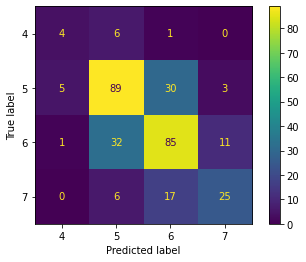

In [ ]:
svc = SVC(C=150, kernel='poly', degree=5)
svc.fit(x_train, y_train)
preds = svc.predict(x_test)
svc_f1_avg = f1_score(y_test, preds, average="weighted")
print("F1_weighted: ", svc_f1_avg)

probs = ['{}'.format(i) for i in range(4, 8)]
cm = confusion_matrix(y_test, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=probs);
disp.plot();

In [ ]:
folds = 5
svc_base_accuracy = cross_val_score(svc, ds[ds.columns[:-1]], ds["quality"], cv=folds)
svc_base_f1 = cross_val_score(svc, ds[ds.columns[:-1]], ds["quality"], cv=folds, scoring=make_scorer(f1_score, average='weighted'))
print(f"Folds: {folds};\nAccuracy: folds - {svc_base_accuracy}, mean - {np.mean(svc_base_accuracy)};\nF1: folds - {svc_base_f1}, mean - {np.mean(svc_base_f1)}.")

Folds: 5;
Accuracy: folds - [0.54603175 0.52547771 0.48726115 0.48726115 0.50636943], mean - 0.5104802345566677;
F1: folds - [0.50312028 0.46461837 0.43569001 0.42691964 0.45552467], mean - 0.4571745931600941.


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=270775b0-34bf-4378-8aec-1c60ee7055a4' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>